Predicting Customer Churn using Bank data

In [74]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [75]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\ChurnModeling.csv")

In [76]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


checking for NA(s)

In [79]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [80]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Renaming the "Exited" comlumn to "Churn"

In [81]:
data.rename(columns={"Exited":"Churn"}, inplace=True)

In [82]:
print("Value Counts for customers that have not churn and churn:")
data["Churn"].value_counts(normalize=True)*100

Value Counts for customers that have not churn and churn:


0    79.63
1    20.37
Name: Churn, dtype: float64

In [83]:
print("Value Counts for credit cards owners:")
data["HasCrCard"].value_counts(normalize=True)*100

Value Counts for credit cards owners:


1    70.55
0    29.45
Name: HasCrCard, dtype: float64

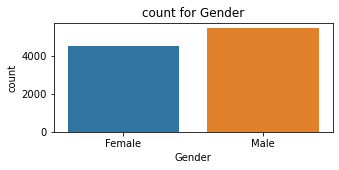

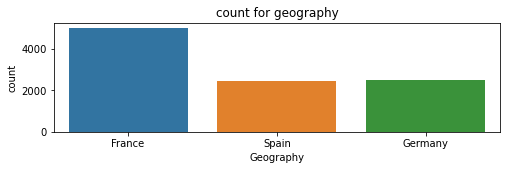

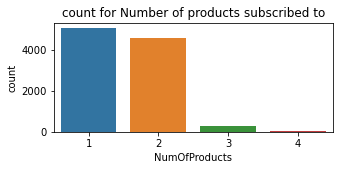

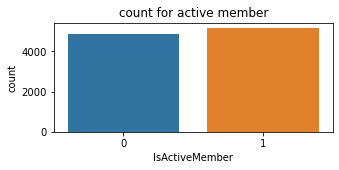

In [84]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) 

plt.figure(figsize=(5, 2))
sns.countplot(data["Gender"])
plt.title("count for Gender")
plt.show()

plt.figure(figsize=(8, 2))
sns.countplot(data["Geography"])
plt.title("count for geography")
plt.show()

plt.figure(figsize=(5, 2))
sns.countplot(data["NumOfProducts"])
plt.title("count for Number of products subscribed to")
plt.show()

plt.figure(figsize=(5, 2))
sns.countplot(data["IsActiveMember"])
plt.title("count for active member")
plt.show()

Value Counts for customers who have churn by Tenure:
Tenure  Churn
0       0        318
        1         95
1       0        803
        1        232
2       0        847
        1        201
3       0        796
        1        213
4       0        786
        1        203
5       0        803
        1        209
6       0        771
        1        196
7       0        851
        1        177
8       0        828
        1        197
9       0        771
        1        213
10      0        389
        1        101
Name: Churn, dtype: int64


Text(0, 0.5, "In 1000's")

<Figure size 576x144 with 0 Axes>

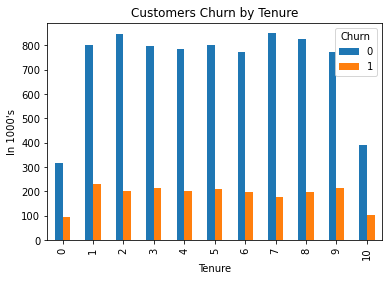

In [85]:
print("Value Counts for customers who have churn by Tenure:")
print(data.groupby("Tenure")["Churn"].value_counts())


data_11=data.groupby("Tenure")["Churn"].value_counts()
data_11 = data_11.unstack() 

# Plot histogram 
plt.figure(figsize=(8, 2))
data_11.plot(kind='bar', stacked=False)
plt.title("Customers Churn by Tenure")
plt.ylabel("In 1000's")

Value Counts for customers who have churn by number of products  signed up to:
NumOfProducts  Churn
1              0        3675
               1        1409
2              0        4242
               1         348
3              1         220
               0          46
4              1          60
Name: Churn, dtype: int64


Text(0, 0.5, 'Customers')

<Figure size 576x576 with 0 Axes>

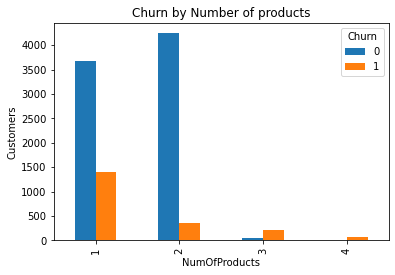

In [86]:
print("Value Counts for customers who have churn by number of products  signed up to:")
print(data.groupby("NumOfProducts")["Churn"].value_counts())

data_2=data.groupby("NumOfProducts")["Churn"].value_counts()

data_2 = data_2.unstack() 

# Plot histogram 
plt.figure(figsize=(8, 8))
data_2.plot(kind='bar', stacked=False)
plt.title("Churn by Number of products")
plt.ylabel("Customers")

Value Counts for credit Card owner by Tenure:
Tenure  HasCrCard
0       1            268
        0            145
1       1            701
        0            334
2       1            738
        0            310
3       1            730
        0            279
4       1            709
        0            280
5       1            700
        0            312
6       1            694
        0            273
7       1            726
        0            302
8       1            742
        0            283
9       1            692
        0            292
10      1            355
        0            135
Name: HasCrCard, dtype: int64


Text(0, 0.5, 'Customers')

<Figure size 576x576 with 0 Axes>

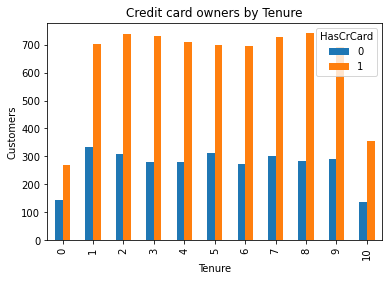

In [87]:
print("Value Counts for credit Card owner by Tenure:")
print(data.groupby("Tenure")["HasCrCard"].value_counts())


data_1=data.groupby("Tenure")["HasCrCard"].value_counts()

data_1 = data_1.unstack() 

# Plot histogram 
plt.figure(figsize=(8, 8))
data_1.plot(kind='bar', stacked=False)
plt.title("Credit card owners by Tenure")
plt.ylabel("Customers")

Value Counts for churn by Members Active Status:
IsActiveMember  Churn
0               0        3547
                1        1302
1               0        4416
                1         735
Name: Churn, dtype: int64


Text(0, 0.5, 'cutomers')

<Figure size 576x144 with 0 Axes>

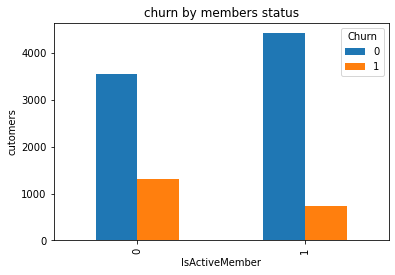

In [88]:
print("Value Counts for churn by Members Active Status:")
print(data.groupby("IsActiveMember")["Churn"].value_counts())



data_111=data.groupby("IsActiveMember")["Churn"].value_counts()

data_111 = data_111.unstack() 

# Plot histogram 
plt.figure(figsize=(8, 2))
data_111.plot(kind='bar', stacked=False)
plt.title("churn by members status")
plt.ylabel("cutomers")

Value Counts for churn by credit card ownership:
HasCrCard  Churn
0          0        2332
           1         613
1          0        5631
           1        1424
Name: Churn, dtype: int64


Text(0, 0.5, 'cutomers')

<Figure size 576x144 with 0 Axes>

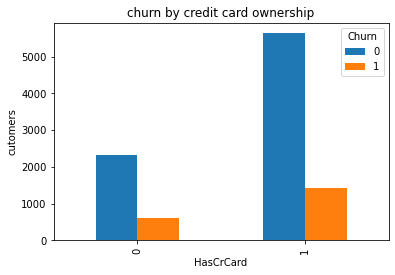

In [89]:
print("Value Counts for churn by credit card ownership:")
print(data.groupby("HasCrCard")["Churn"].value_counts())



data_1111=data.groupby("HasCrCard")["Churn"].value_counts()

data_1111 = data_1111.unstack() 

# Plot histogram 
plt.figure(figsize=(8, 2))
data_1111.plot(kind='bar', stacked=False)
plt.title("churn by credit card ownership")
plt.ylabel("cutomers")

In [90]:
print("percentage of churn by Gender:")  
data.groupby("Churn")["Gender"].value_counts(normalize=True)*100

percentage of churn by Gender:


Churn  Gender
0      Male      57.252292
       Female    42.747708
1      Female    55.915562
       Male      44.084438
Name: Gender, dtype: float64

In [91]:
print("percentage of churn by geography:")
data.groupby("Churn")["Geography"].value_counts(normalize=True)*100

percentage of churn by geography:


Churn  Geography
0      France       52.794173
       Spain        25.919879
       Germany      21.285948
1      Germany      39.960727
       France       39.764359
       Spain        20.274914
Name: Geography, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimated Salary')

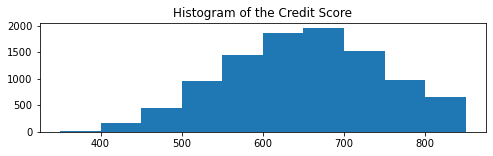

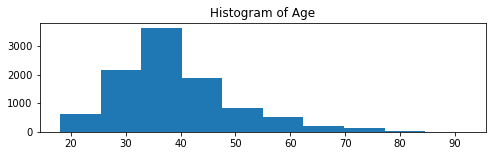

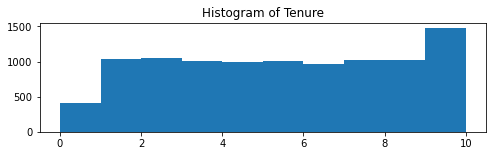

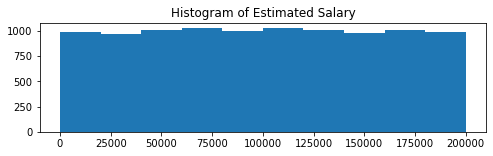

In [92]:
plt.figure(figsize=(8, 2))
plt.hist(data["CreditScore"])
plt.title("Histogram of the Credit Score")

plt.figure(figsize=(8, 2))
plt.hist(data["Age"])
plt.title("Histogram of Age")

plt.figure(figsize=(8, 2))
plt.hist(data["Tenure"])
plt.title("Histogram of Tenure")

plt.figure(figsize=(8, 2))
plt.hist(data["EstimatedSalary"])
plt.title("Histogram of Estimated Salary")

In [93]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'Histogram of the Tenure')

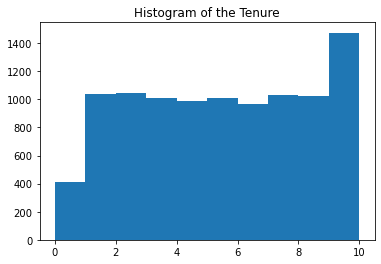

In [94]:
plt.hist(data["Tenure"])
plt.title("Histogram of the Tenure")

<Figure size 864x576 with 0 Axes>

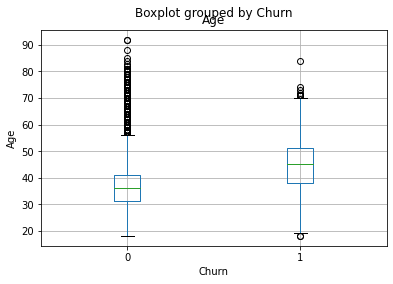

In [95]:
plt.figure(figsize=(12, 8))
data.boxplot(column='Age', by="Churn")
plt.ylabel("Age")
plt.show()

Text(0, 0.5, 'Credit Score')

<Figure size 1440x1440 with 0 Axes>

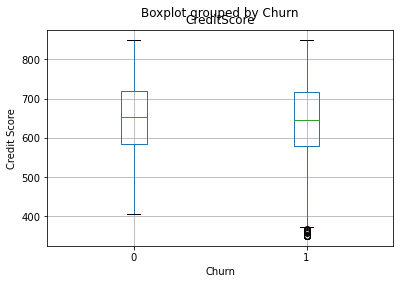

In [96]:
plt.figure(figsize=(20, 20))
data.boxplot(column='CreditScore', by="Churn")
plt.ylabel("Credit Score")

Text(0, 0.5, 'EstimatedSalary')

<Figure size 1440x1440 with 0 Axes>

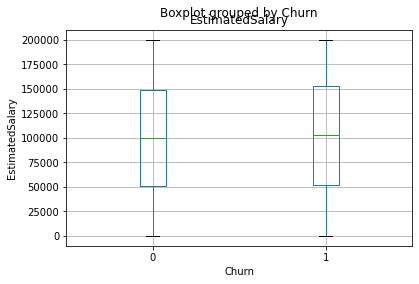

In [97]:
plt.figure(figsize=(20, 20))
data.boxplot(column='EstimatedSalary', 
             by="Churn")
plt.ylabel("EstimatedSalary")

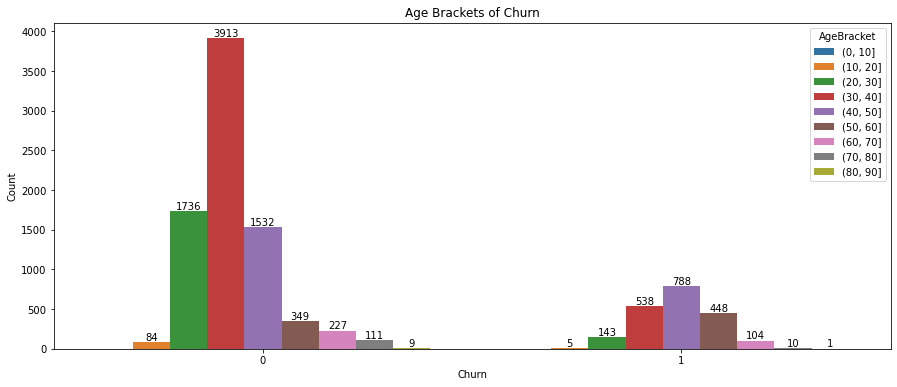

In [123]:
data['AgeBracket'] = pd.cut(data["Age"], bins=[0,10,20,30,40,50,60,70,80,90])


plt.figure(figsize=(15, 6))
ax = sns.countplot(data=data, x="Churn", hue='AgeBracket')

plt.ylabel("Count")
plt.title("Age Brackets of Churn")

# Adding count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

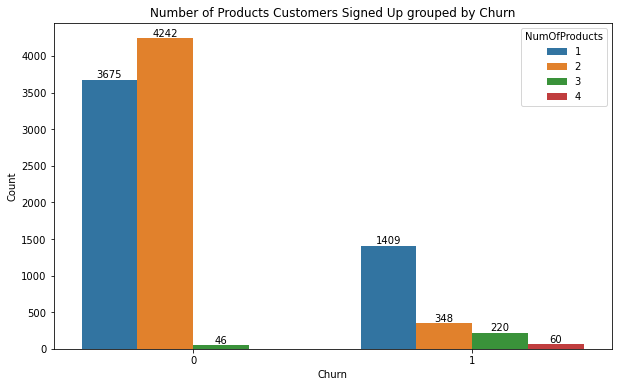

In [124]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data,x="Churn", hue='NumOfProducts')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.ylabel("Count")
plt.title("Number of Products Customers Signed Up grouped by Churn")
plt.show()


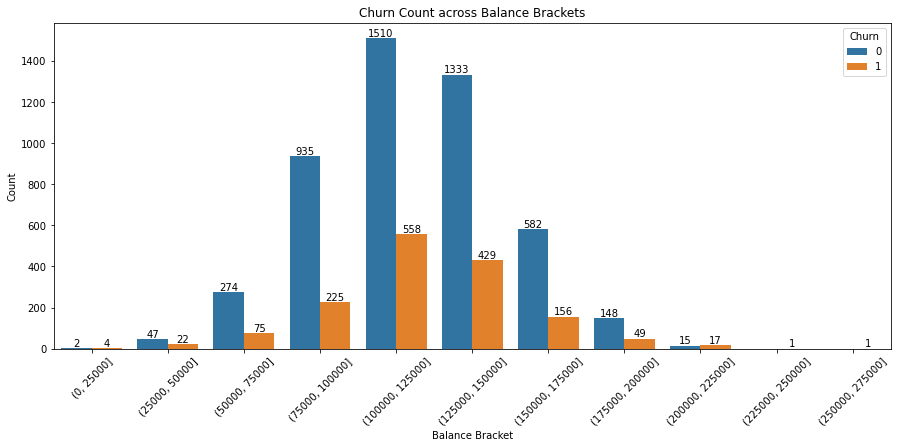

In [125]:
data['BalanceBracket'] = pd.cut(data["Balance"], bins=[0, 25000, 50000, 75000, 100000, 125000, 150000, 175000,
                                                       200000, 225000, 250000, 275000])

plt.figure(figsize=(15, 6))
ax = sns.countplot(data=data, x="BalanceBracket", hue='Churn')

plt.xlabel("Balance Bracket")
plt.ylabel("Count")
plt.title("Churn Count across Balance Brackets")

# Adding count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

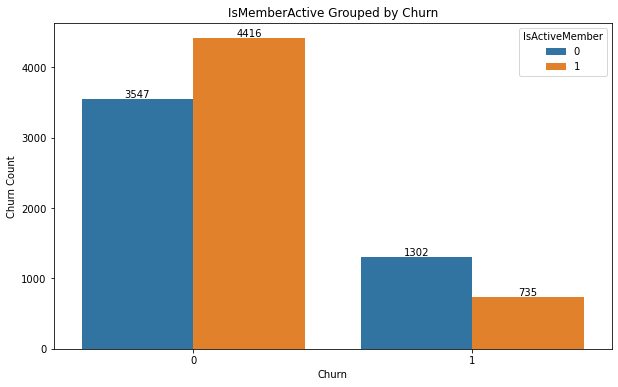

In [127]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data,x="Churn", hue='IsActiveMember')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.ylabel("Churn Count")
plt.title("IsMemberActive Grouped by Churn")
plt.show()

<AxesSubplot:>

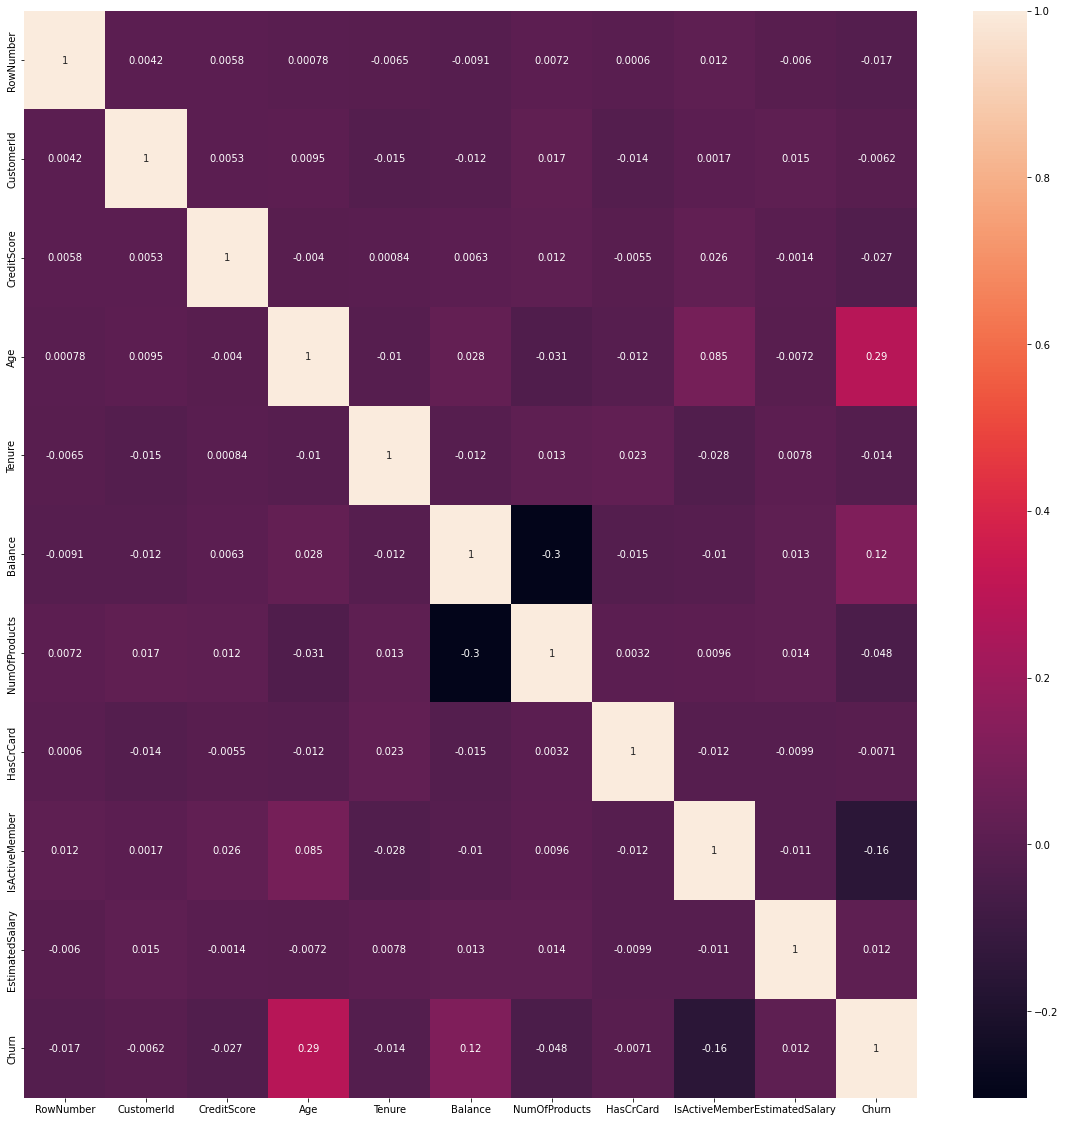

In [98]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

 The correlation analysis reveals that there is no strong linear relationship between the features and most importantly churn.The absence of strong correlations(linear relationship) suggests that customer churn may be caused by multiples factors(features).

DROPPING AND GETTING DUMMIES FOR SOME FEATURES.  The  following columns 'RowNumber', 'CustomerId',  and 'Surname', will be dropped to avoids noise, overfitting; they lack predictive relevance in analysis.

In [99]:
data= data.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

In [100]:
print(data["Geography"].unique())
print(data["Gender"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [101]:
data= pd.get_dummies(data, columns=['Geography', 'Gender'])

training the models and importing neccesery libraries 

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X= data.drop(["Churn"],axis=1)
y= data["Churn"]

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [105]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [106]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [107]:
# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier()
]

accuracies_untuned = {}  # Dictionary to store accuracies

# Train and get accuracy for each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__  # Get the name of the classifier
    clf.fit(X_train, y_train)  # Train the classifier
    preds = clf.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, preds)  # Calculate accuracy
    accuracies_untuned[clf_name] = acc # Store accuracy

# Print accuracies for each classifier
for clf_name, acc in accuracies.items():
    print(f"Accuracy of {clf_name}: {acc:.4f}")

Accuracy of RandomForestClassifier: 0.8690
Accuracy of SVC: 0.8053
Accuracy of KNeighborsClassifier: 0.7707
Accuracy of DecisionTreeClassifier: 0.8077
Accuracy of XGBClassifier: 0.8660
Accuracy of GradientBoostingClassifier: 0.8720


In [109]:
# Define hyperparameters for grid search for each classifier
parameters= {
    'RandomForestClassifier': {'n_estimators': [50, 100, 200]},
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
    'DecisionTreeClassifier': {'max_depth': [None, 5, 10, 20]},
    'XGBClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]}
}


best_models = {}  # Dictionary to store best models

# Perform grid search and get best models for each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__ 
    grid_search = GridSearchCV(clf, parameters[clf_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[clf_name] = grid_search.best_estimator_
# Evaluate best models and print accuracies
accuracies = {}
for clf_name, best_model in best_models.items():
    preds = best_model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[clf_name] = acc
    print(f"Accuracy of {clf_name}: {acc:.4f}")

Accuracy of RandomForestClassifier: 0.8703
Accuracy of SVC: 0.8053
Accuracy of KNeighborsClassifier: 0.7787
Accuracy of DecisionTreeClassifier: 0.8620
Accuracy of XGBClassifier: 0.8717
Accuracy of GradientBoostingClassifier: 0.8720


In [110]:
results_df = pd.DataFrame({
    'Untuned Model Accuracy': accuracies_untuned.values(),
    'Tuned Model Accuracy': accuracies.values()
}, index=accuracies_untuned.keys())
print(results_df)

                            Untuned Model Accuracy  Tuned Model Accuracy
RandomForestClassifier                    0.868333              0.870333
SVC                                       0.805333              0.805333
KNeighborsClassifier                      0.770667              0.778667
DecisionTreeClassifier                    0.802333              0.862000
XGBClassifier                             0.866000              0.871667
GradientBoostingClassifier                0.872000              0.872000


from the above table results, the GradientBoostingClassifier  has the best performance and it has same results when tuned. 
so we refit the model, and extract other metrics from it. the model will be the model to be deployed also

In [112]:
model= GradientBoostingClassifier()
model=model.fit(X_train,y_train)
predictions= model.predict(X_test)

Metrics for the model

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generating classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Accuracy: 0.872
Confusion Matrix:
[[2333   83]
 [ 301  283]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.77      0.48      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



Model Explainability

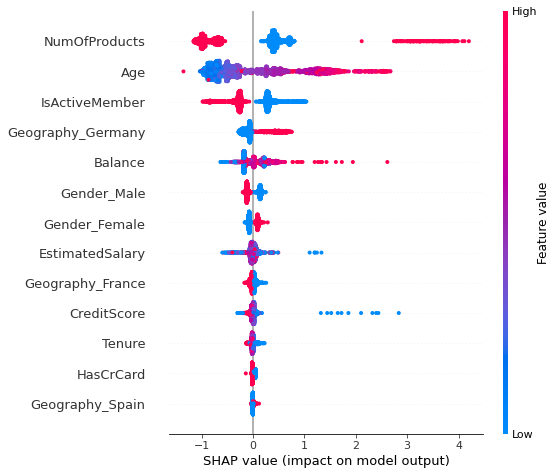

In [114]:
import shap

explainer = shap.Explainer(model)
shap_values= explainer(X_test)

shap.summary_plot(shap_values, X_test)

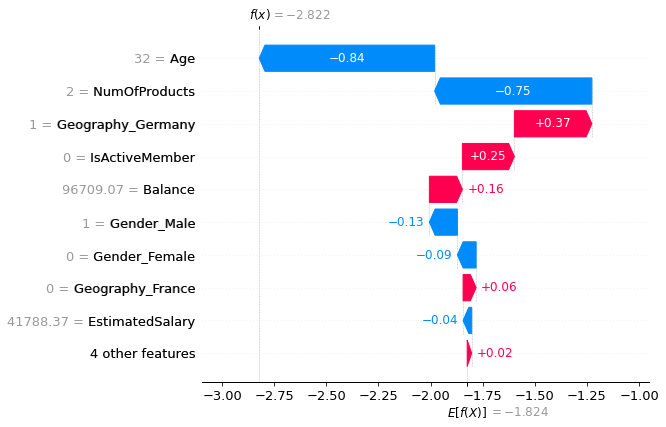

In [115]:
shap.plots.waterfall(shap_values[0])

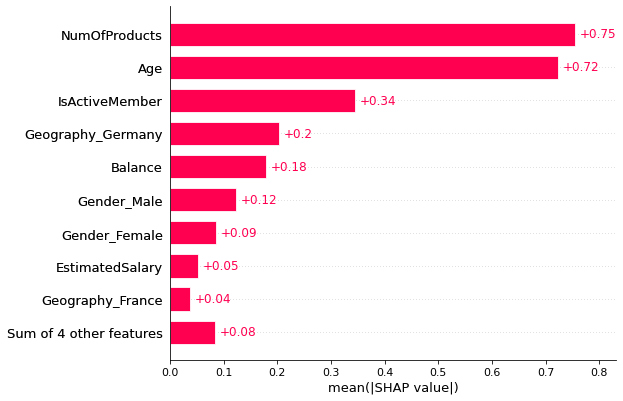

In [116]:
shap.plots.bar(shap_values)

from the plot above, NumOfProducts, Age,  IsActiveMember, Geograpy_Germany and Balance are the most important features to the model contributing to the model predictions which needs to be analysed for recommendation purpose.

Recommendations:
Rentention efforts/campaigns should be targeted for customers between ages 30  to 60 because they make up 60% of those that have churn.
The bank should put in more efforts in signing up customers for 2 products maximum as customers onboarded for more that 3 or 4 products has a churn to non churn ratio higher than 100%, while 1 product has 38% and 2 products just 8%.

Retention efforts should be targerted for customers with balances ranging from  75000 to 150000 because 56% of the churn were from those balances. Again, retention efforts should be targeted on both active and non active members with more emphasis on the non active members, beacuse they churn to non churn ratio for non active member and active member is 36.07% and 16.64% respectively

Conclusion:
Exploratory data analysis shows customer churn is higher for shorter tenures, inactive members, and those with more products. Churn is also higher for females and customers in Germany.
Correlation analysis shows there are no strong linear relationships between features and churn, suggesting churn is caused by multiple factors.
The  GradientBoostingClassifier model was deployed because its accuracy of 87% out performed all other models trained.
Model explainability analysis showed that age, number of products, active membership, geography and Balance are the most important features.
Further analysis looks at churn by age, number of products, and active status to under the churn patterns. Recommendations are made to target retention campaigns at 30-60 ages, 1-2 products, inactive members, females and Germany.